In [19]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np

# Open the TIFF file
with rasterio.open('vhm_2222_132.tif') as src:

    # Check if it is a GeoTIFF
    if src.crs is not None:
        print('The file is a GeoTIFF.')

    # Print the metadata
    print('Metadata:')
    print(src.meta)

The file is a GeoTIFF.
Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 260, 'height': 388, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(0.49755333725800127, 0.0, -5207795.510432953,
       0.0, -0.4987052823425144, -2722974.075891806)}


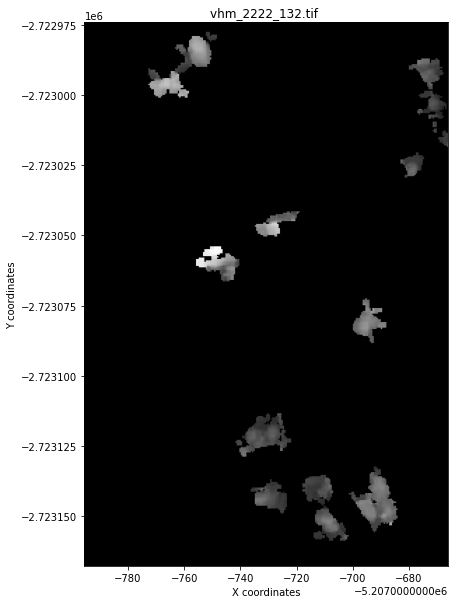

In [20]:
# Open the GeoTIFF file using rasterio
with rasterio.open("vhm_2222_132.tif") as src:
    # Read the file as a numpy array
    vhm = src.read(1)
    
    

    # Get the spatial transform information
    transform = src.transform

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the raster image
    ax.imshow(img, cmap='gray', extent=rasterio.plot.plotting_extent(src, transform))

    # Add a title and labels to the plot
    ax.set_title("vhm_2222_132.tif ")
    ax.set_xlabel("X coordinates")
    ax.set_ylabel("Y coordinates")

    # Show the plot
    plt.show()

In [21]:
print(vhm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
nonzero_count = np.count_nonzero(vhm)
zero_count = vhm.size - nonzero_count
total_count = vhm.size
zero_fraction = zero_count / total_count




print(f"Number of non-zero elements: {nonzero_count}")
print(f"Number of zero elements: {zero_count}")
print(f"Fraction of zero elements (buildings): {zero_fraction} ")
print(f"Fraction of buildings in the photo: {zero_fraction} ")



Number of non-zero elements: 4940
Number of zero elements: 95940
Fraction of zero elements (buildings): 0.9510309278350515 
Fraction of buildings in the photo: 0.9510309278350515 


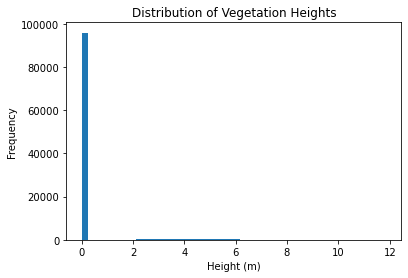

In [26]:
plt.hist(vhm.flatten(), bins=50)
plt.title("Distribution of Vegetation Heights")
plt.xlabel("Height (m)")
plt.ylabel("Frequency")
plt.show()

In [40]:
# Filter out the zero values
nonzero_vhm = vhm[~np.isnan(vhm) & (vhm != 0)]
max_height = np.max(nonzero_vhm)
min_height = np.min(nonzero_vhm)
median_height = np.median(nonzero_vhm)
variance_height = np.var(nonzero_vhm)

print(f"max: {max_height}", f"min: {min_height}", f"median: {median_height}")

quantiles = np.quantile(vhm[vhm != 0], [0.25, 0.5, 0.75])
print(f"Here are the quantiles [25%, 50%, 75%]: {quantiles}")


max: 11.854811668395996 min: 1.619421362876892 median: 4.300529479980469
Here are the quantiles [25%, 50%, 75%]: [3.13426065 4.30052924 5.77675283]


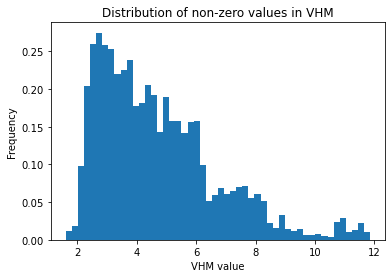

In [32]:
# Plot the histogram of the non-zero values
plt.hist(nonzero_vhm, bins=50, density=True)
plt.title('Distribution of non-zero values in VHM')
plt.xlabel('VHM value')
plt.ylabel('Frequency')
plt.show()